#Introduction to Linear Algebra and the world of probablitites

In this work-sheet, we shall do two activities. First of all we shall check the power of SVD. Then we shall check how may we generate data from an arbitrary distribution (given that we have the ability to generate data from a uniform distribution).

##Singular Value Decomposition
Lets load an image and try to do it's SVD.

Please note the way to access an image from your Google drive. Change the code accordingly (and load an image in your Google drive) to access to your own image!

Mark that we shall be using PIL's Image library, a useful set of powerful algorithms for image processing.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

In [ ]:
# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lets load the image and convert that to a gray-scale version (so that we can treat it just like a 2D matrix). What will happen if its not gray-scale?

Mark how we have used the command $matrix$ to generate a matrix from the image!

### Answers
If we had not a gray-scale image (like RGB), we would have 2 additional layers of band components. For example, first layer is red, second green and the third would be blue. All of those would be presented in a gray scale.

# City centre
The city centre of Bytom

In [2]:
img = Image.open("Bytom.png")
imggray = img.convert('L')

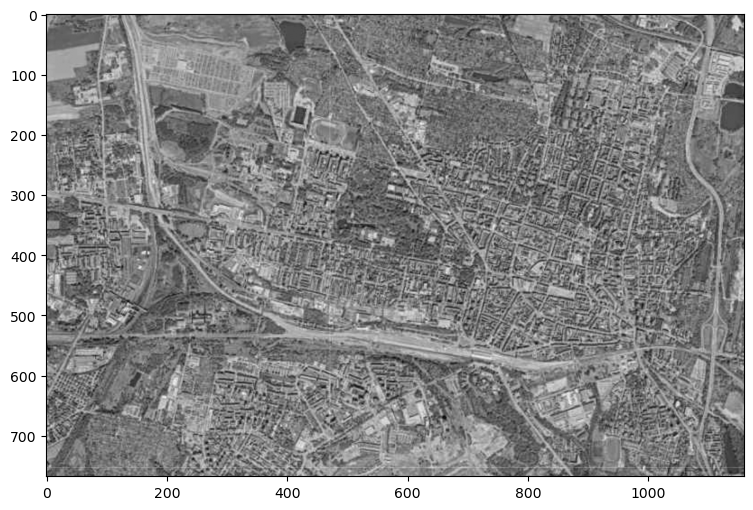

In [3]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')

###SVD

We can directly use the $svd$ command from Numpy to operate SVD on the matrix.

Lets first check how the image will look if we only use a single vector to reconstruct the image.

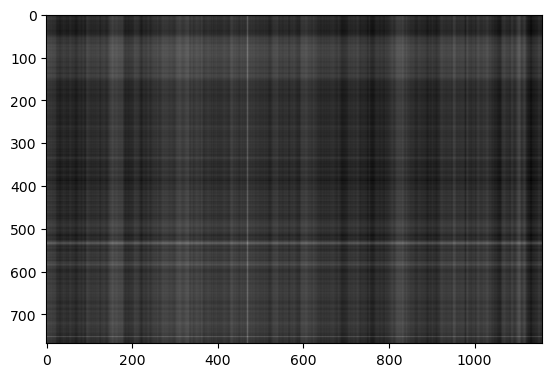

In [4]:
U, sigma, V = np.linalg.svd(imgmat)
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');


Now lets check how does the sigma vector look like.

What do you observe? How many vecotrs can we use to get a decent reconstruction of the image?
What will happen if we omit the first 1-2 vectors (corresponding to the largest eigen values)?

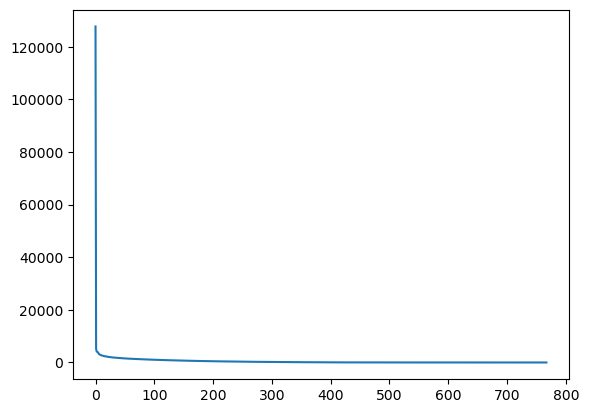

In [9]:
U.shape
sigma.shape
plt.plot(sigma)

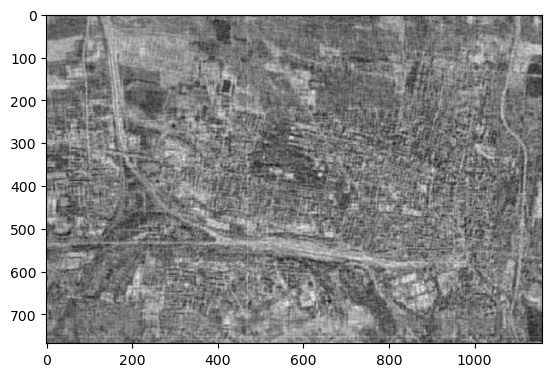

In [15]:
#i = 70
i = 50
j = 0
reconstimg = np.matrix(U[:, j:i]) * np.diag(sigma[j:i]) * np.matrix(V[j:i, :])
plt.imshow(reconstimg, cmap='gray');

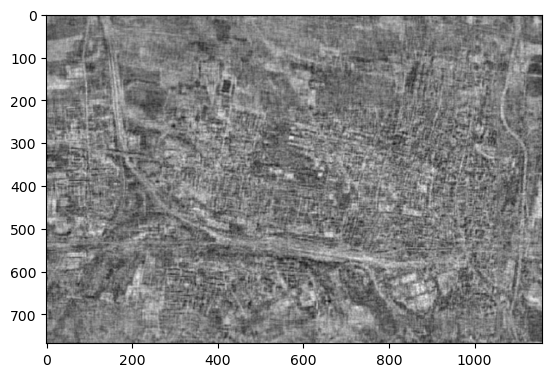

In [ ]:
#i = 70
i = 50
j = 2 # omiting first 2 vectors
reconstimg = np.matrix(U[:, j:i]) * np.diag(sigma[j:i]) * np.matrix(V[j:i, :])
plt.imshow(reconstimg, cmap='gray');

### Results
For reconstructing an image of the city centre we need at least 50 vectors. In that case we can differ particular streets. When we have 40 vectors, main streets are distinguishable, but smaller ones not. 
Omiting first 2 vectors may sharpen edges, but it doesn't seem to make a big difference.

# Mountain
The photo of Tatra Mountain

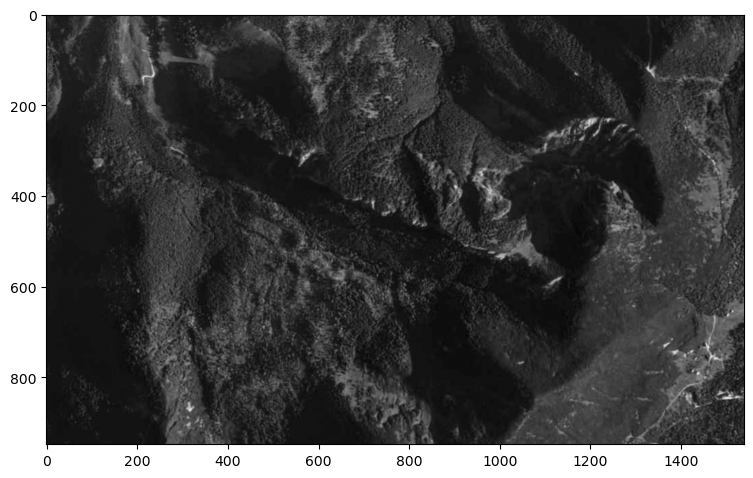

In [17]:
img2 = Image.open("Tatry.png")
imggray2 = img2.convert('L')
imgmat2 = np.array(list(imggray2.getdata(band=0)), float)
imgmat2.shape = (imggray2.size[1], imggray2.size[0])
imgmat2 = np.matrix(imgmat2)
plt.figure(figsize=(9,6))
plt.imshow(imgmat2, cmap='gray')

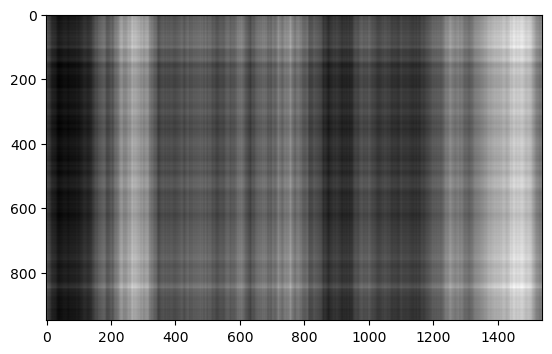

In [18]:
U2, sigma2, V2 = np.linalg.svd(imgmat2)
reconstimg2 = np.matrix(U2[:, :1]) * np.diag(sigma2[:1]) * np.matrix(V2[:1, :])
plt.imshow(reconstimg2, cmap='gray');

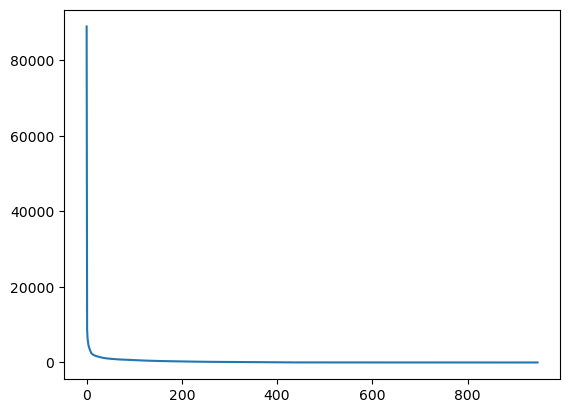

In [19]:
U2.shape
sigma2.shape
plt.plot(sigma2)

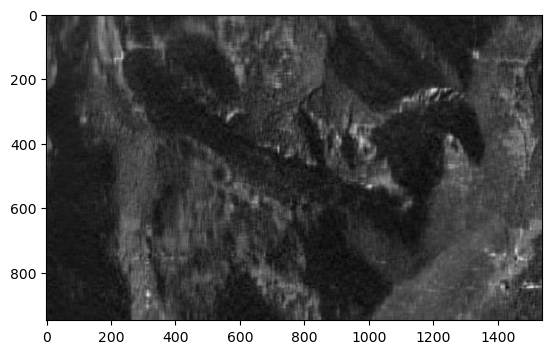

In [24]:
i = 40
j = 0
reconstimg2 = np.matrix(U2[:, j:i]) * np.diag(sigma2[j:i]) * np.matrix(V2[j:i, :])
plt.imshow(reconstimg2, cmap='gray');

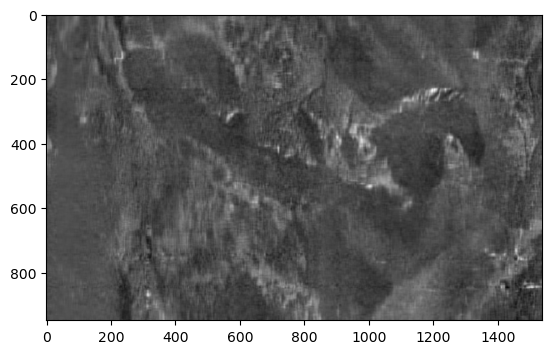

In [23]:
i = 40
j = 2 # ommiting the first 2 vectors
reconstimg2 = np.matrix(U2[:, j:i]) * np.diag(sigma2[j:i]) * np.matrix(V2[j:i, :])
plt.imshow(reconstimg2, cmap='gray');

### Results
In the mountain case 40 vectors are enough to see what we have in the picture. Omiting first 2 vectors makes image much brighter.

### Summary
For artificial, made by human places like city centres, we need more vectors to reconstruct image properly. In those cases omiting first vectors doesn't change a much.
For natural structures like mountain it is enough to use less vectors to make things distinguishable because of the less complicated structure of the surface. Moreover, omiting first vectors can change a lot.